<h1>2° Laboratorio de EYP3701</h1>

<h2><span style="color:chocolate;">Introduction to PCA and anomalies detection</span></h2>

<p><strong>Ayudante</strong> Diego Bernal</p>

<ul>
    <li>Comment your code.</li>
    <li>Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.</li>
    <li>Try to minimize the use of the global namespace (meaning, keep things inside functions).</li>
</ul>


<p>Based in the notes of ICL and Standford in computing principal componnets analysis, unsupervised Learning</p>

<h1>Matrices with random values to apply PCA step by step</h1>

In a general manner we are interesed in know *things* about $X's$,for example, like discover sub-groups using data visualization in two dimensions, but in all of our problems we have a set of X's features and if we want to saw the relation between all pairs of features, we would need to create around $\frac{p}{2} \to \frac{p(p-1)}{2}$ plots.



We could use a better approach finding a low-dimensional representation of the data-set that captures most of the information(maximum variance), in other words, we want a representation that captures as much as possible of the variation in lower dimmensions!

PCA seeks a small number of new dimensions that retains most of the structure of the data.

For example:

Imagine that we have a set of features $X_1,X_2, \dots, X_p$ the first principal componenets is defined as the normalized linear combination of these features.That has the larger Variance!

The fisrt assumption is that every dimension was centered for saving problems in the future with comparing apples with pears

$$
Z_1 = \phi_{11}X_1 + \phi{21}X_2 + \dots + \phi_{p1}X_p
$$

We refer as $\phi$ as the loadings, and we refer as normalized $\sum_{j=1}^{P} \phi_{j1}^2 = 1$


This linar combination is chosen such that the variance $Z_1$ is larger as possible- this means we are capturing the *direction* along wich the data is more **spread** out. The vector $\phi_1 = (\phi_{11}+ \phi{21} +\dots + \phi{p1})^T$ is called the first **loading vector**, and it solves the following optimization problem








$$
\begin{aligned}
\max_{\phi_{11},\dots, \phi_{p1}} \quad & {\frac{1}{n}( \sum_{j=1}^P \phi_{j1}x_{ij})^2} \\
    \text{sa} \quad & \sum_{j=1}^P \phi_{j1}^2 = 1, \quad \forall i \\
\end{aligned}
$$

Once, we compute the first componenet $Z_1$, we proceed to find the second one $Z_2$, wich is again a linar combination of the orginal features, but this time it has to be orthogonal to $Z_1$ and capture the highest variance. We could compute upt to $p$ principal componenets, since each one is a direction in $R^P$ but we would only compute $k<p$ 


<h2>Matrix language:</h2>

If we stack all $\phi_k$'s into a matrix $U_k = [\phi_1,\phi_2,\dots,\phi_d]\in \mathbb{R}^{pxk}$, then we can compute all the componenets at once:

$$
Y = U_{k}^TX
$$

Where:

1. $X \in \mathbb{R}^{p \times n}$ is the **data matrix**, with each **column as an observation** and each **row as a feature**.
2. $U_k \in \mathbb{R}^{p \times k}$ contains the first $k$ principal directions (loading vectors).
3. $Y \in \mathbb{R}^{k \times n}$ is the low-dimensional representation of the data.

Each **column of $Y$** corresponds to a projected observation in the reduced $k$-dimensional space.
Each **row of $Y$** corresponds to a principal componenet.

$$
\mathbf{Y} =
\begin{pmatrix}
Z_{1}^{(1)} & Z_{1}^{(2)} & \dots & Z_{1}^{(n)} \\
Z_{2}^{(1)} & Z_{2}^{(2)} & \dots & Z_{2}^{(n)} \\
\vdots & \vdots & \ddots & \vdots \\
Z_{k}^{(1)} & Z_{k}^{(2)} & \dots & Z_{k}^{(n)}
\end{pmatrix}
$$

Where $Z_j^{(i)}$ is the value of the $j$-th principal componenet fro the $i$-th observation

## How to compute The matrix $U_k$ and $Y$

![image of the algorithm](./imgs/img_1.png)

<h3>1. Center the data </h3>

We substract the vector mean for each feature:

$$
X_{\text{centered}} = X - \mu \mathbf{1}^T
$$

<h3>2. Compute the dot product matrix </h3>

We calculate the symmetric matrix:

$$
X^T X = \sum_{i=1}^{n} x_i^{(\text{cent})^T} x_i^{(\text{cent})}
$$

This matrix is used for eigen decomposition in the dual space.

<h3>3. Eigen decomposition</h3>

We perform:

$$
X^T = V \Lambda V^T 
$$

- $V \in \mathbb{R}^{n \times n}$ contains the eigenvectors.
- $\Lambda \in \mathbb{R}^{n \times n}$ is diagonal with eigenvalues.


We sort eigenvalues in descending order and select the top $k$:

- $V_k = [v_1, \dots, v_k] \in \mathbb{R}^{n \times k}$
- $\Lambda_k = \text{diag}(\lambda_1, \dots, \lambda_k)$



<h2>4. Compute the eigenvectors in original space</h2>


To recover the principal directions (loadings) in the original space:

$$
U_k = X_{\text{centered}} V_k \Lambda_k^{-\frac{1}{2}} \in \mathbb{R}^{p \times k}
$$


These are the actual directions (eigenvectors) in the original feature space.

<h2>5. Project the data</h2>

We compute the projection

$$
Y = U_k^T X_{\text{centered}} \in \mathbb{R}^{k \times n}
$$

This gives us the coordinates of each observation in the $k$-dimensional principal component space.



In [ ]:
#Install the librarys that we would use
%pip install numpy pandas matplotlib seaborn 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Diego\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from pca import generate_n_dimensions, calculate_pca

In [4]:
X = generate_n_dimensions(100,5)
X[:10]

array([[-5.75595457, -1.93441802, -6.91083382,  2.62036818, -2.65035901],
       [-5.73499131,  9.04131213,  6.61149658, -6.61385502,  7.21273995],
       [-6.09362021,  7.45600307,  1.46638585, -1.66823876, -7.09203097],
       [ 7.60719458,  5.34465154, -3.71954785, -3.3075065 , -2.84695671],
       [-3.27354961,  4.74507131,  7.20908487,  3.2576996 ,  8.3578817 ],
       [-2.81986   ,  1.98063012, -5.03890696, -6.80525369, -7.83603297],
       [ 6.50749521,  8.14564604,  9.35777093,  3.8150144 , -2.72092659],
       [-1.96500136, -4.72741685,  8.62011948, -3.56234117,  7.18111843],
       [-5.66881895, -0.41739264, -4.45221578,  2.94066887,  3.84246141],
       [-4.03697274,  0.84109427, -7.62564388, -2.64713911,  4.10375949]])

In [ ]:
Y, u_d,pve = calculate_pca(X,n_components=2)

In [6]:
u_d

array([[ 0.61428665,  0.03512937],
       [ 0.48133715, -0.0353311 ],
       [ 0.324872  , -0.59938639],
       [ 0.10404738, -0.63223268],
       [-0.52402174, -0.48840089]])

In [7]:
np.sum(pve)

0.5003381299532508

In [8]:
Y.shape

(100, 2)

In [9]:
X_origin = np.zeros(len(u_d))
Y_origin = np.zeros(len(u_d))

U = u_d[:, 0]
V = u_d[:, 1]

colors = plt.cm.viridis(np.linspace(0, 1, len(u_d)))

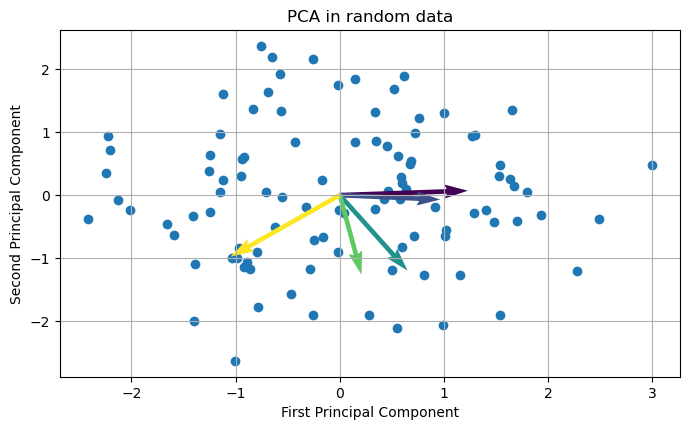

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
ax.scatter(Y[:,0], Y[:,1])
ax.quiver(X_origin, Y_origin, U, V, color=colors, angles='xy', scale_units='xy', scale=0.5)
ax.grid(True)
ax.set_title('PCA in random data')
ax.set_xlabel('First Principal Component'); ax.set_ylabel('Second Principal Component')
plt.show()

In [13]:
pve_list = []
components = X.shape[1]
for k in range(1,components):
    _,_,pve = calculate_pca(X,k)
    pve_list.append(np.sum(pve))

In [14]:
pve_list

[0.26737004379980106,
 0.5003381299532508,
 0.6873403926293239,
 0.8608776086681854]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


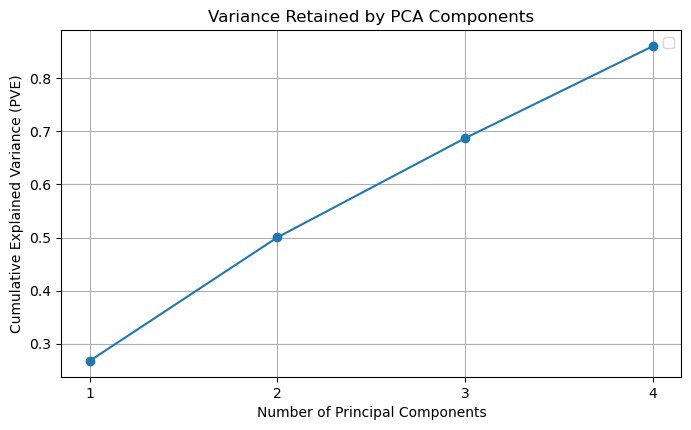

In [15]:
fig, ax =plt.subplots(1,1,figsize = (8,4.5))
x_vals = np.arange(1, len(pve_list) + 1)
ax.plot(x_vals, pve_list, marker='o')

ax.set_xticks(x_vals)  # Force integer ticks on x-axis
ax.set_title('Variance Retained by PCA Components')
ax.set_xlabel('Number of Principal Components');ax.set_ylabel('Cumulative Explained Variance (PVE)')
ax.grid(True)
ax.legend()
plt.show()

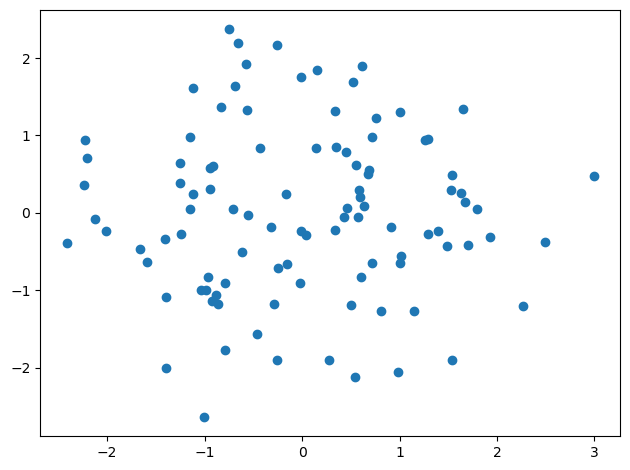

In [16]:
plt.scatter(Y[:,0], Y[:,1])

plt.tight_layout()
plt.show()

<h1>Retained Variability explained</h1>

<p>Add: The variance maximization problem</p>

Is natural to ask how many information we lost with the projection in two dimensions, we are interested in the proportion of the variance explained (PVE).

The total variance is represented by:

$$
\sum_{j=1}^p VAR(X_j) = \sum_{j=1}^p\frac{1}{n} \sum_{i=1}^n x_{ij}^2
$$

And the variance explained by the $m$-th principal componenet.

$$
\frac{1}{N} \sum_{i=1}^n z_{im}^2 = \frac{1}{n} \sum_{i=1}^n(\sum_{j=1}^p \phi_{jm}x_{ij})^2
$$

therefore

$$
PVE = \frac{\sum_{i=1}^n (\sum_{j=1}^p \phi_{jm}x_{ij})^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2}
$$

<ul>
<li>Add the calculation of the total variance explained for each compoenent in the function <b>calculate_pca</b> and return an array</li>
<li>Add an iterator and a visualization for the reteined variance for k < p </li>
<li>Modify the function to retain and expected pve</li>

</ul>

In [17]:
from pca import expected_pve

In [ ]:
Y, v,k = expected_pve(X,0.90) #Number of explained variance that we want

<p>Let's use an example for this Mapping some information related with the state of California</p>

In [51]:
import geopandas as gpd
import folium
import contextily as ctx


In [39]:
cali_drought = gpd.read_file("./data/cali_drought_variables.shp")

In [45]:
df = (
    cali_drought.pivot(index='GEOID', columns='variable', values='value')
    .join(
        cali_drought.drop(columns=['variable', 'value','GEOID_1','variable_1','NAME_1'])
          .drop_duplicates(subset='GEOID')
          .set_index('GEOID'),
        how='left'
    )
    .reset_index()
)

In [137]:
gdf= gpd.GeoDataFrame(df, geometry='geometry')
gdf['NAME'] = gdf['NAME'].str.replace(r' County.*', '', regex=True)
gdf = gdf[~gdf['NAME'].isin(['Los Angeles', 'Alpine'])]

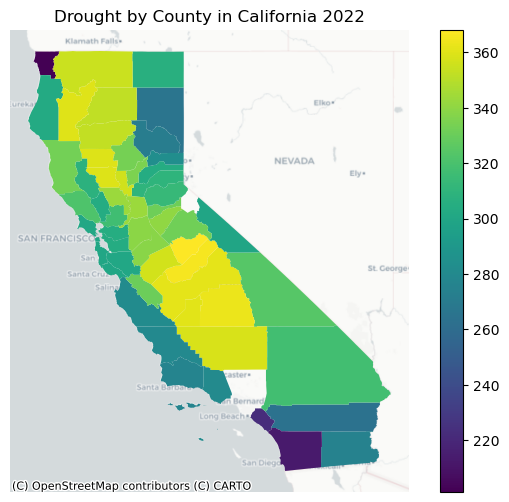

In [138]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
gdf.plot(ax=ax,column='DSCI',legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.axis('off');

ax.set_title('Drought by County in California 2022')

plt.show()

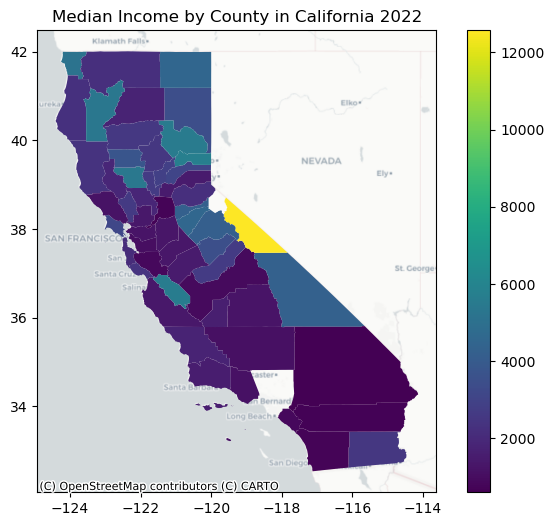

In [139]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
gdf.plot(ax=ax,column='moe',legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.set_title('Median Income by County in California 2022')

plt.show()

<p>Let's apply the PCA componenets for our variables to watch a visualization to prove some groups in our variables</p>

In [140]:
columns = ["Asian","Black","Hispanic","White","DSCI","moe"]
X = gdf[columns].values
Y = gdf['NAME'].values

In [141]:
pca, u, pve = calculate_pca(X,n_components=2)

In [142]:
np.sum(pve)

0.7942079999460245

In [143]:
X_origin = np.zeros(len(u))
Y_origin = np.zeros(len(u))

U = u[:, 0]
V = u[:, 1]

colors = plt.cm.viridis(np.linspace(0, 1, len(u)))


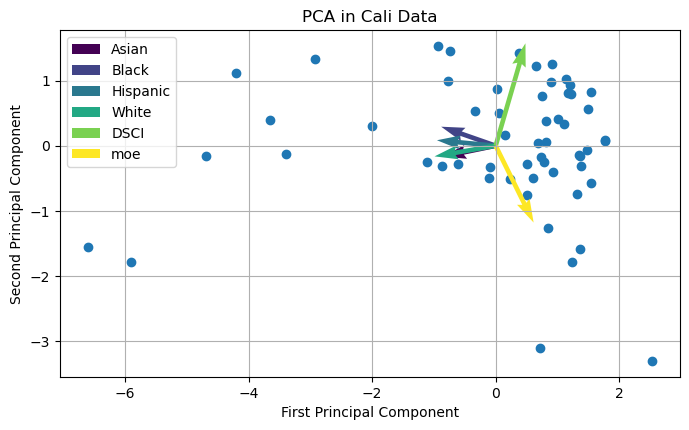

In [144]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
ax.scatter(pca[:,0], pca[:,1])
for i in range(len(columns)):
    ax.quiver(X_origin[i], Y_origin[i], U[i], V[i], color=colors[i], angles='xy', scale_units='xy', scale=0.5,label = columns[i])
ax.grid(True)
ax.set_title("PCA in Cali Data")
ax.set_xlabel("First Principal Component"); ax.set_ylabel("Second Principal Component")
ax.legend()
plt.show()

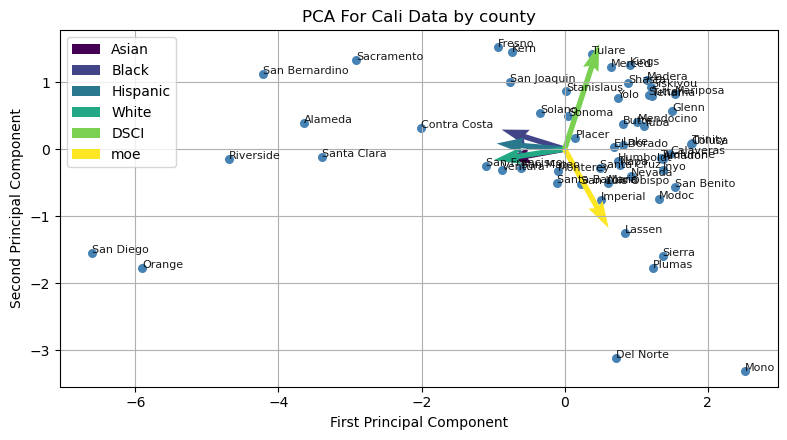

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))

for i in range(len(pca)):
    ax.scatter(pca[i, 0], pca[i, 1], color='steelblue', s=30)
    ax.annotate(Y[i], (pca[i, 0], pca[i, 1]), fontsize=8, alpha=0.9)


for i in range(len(columns)):
    ax.quiver(X_origin[i], Y_origin[i], U[i], V[i],
              color=colors[i], angles='xy', scale_units='xy', scale=0.5,
              label=columns[i])

ax.grid(True)
ax.set_title('PCA For Cali Data by county')
ax.set_xlabel('First Principal Component');ax.set_ylabel('Second Principal Component')
ax.legend()
plt.tight_layout()
plt.show()


<p>Que pasaria si Dejamos los outliers de los estados de Los Angeles y Alpine, como influiria en nuestros resultados, pruebe lo mismo pero ahora reteniendo una varinza sobre el 95%</p>